

---



In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings    
warnings.filterwarnings("ignore")

print("Project has been created with this version of Pandas: " ,pd. __version__," And with this version of Numpy: ",np. __version__)

Project has been created with this version of Pandas:  2.2.2  And with this version of Numpy:  1.26.4


In [2]:
DATA_PATH = Path('../datasets')
RAW_DATA_PATH = DATA_PATH / 'raw'
PROCESSED_DATA_PATH = DATA_PATH / 'processed'

RAW_FILE_PATH = RAW_DATA_PATH / 'LLCP2023.XPT'
PROCESSED_FILE_PATH_PARQUET = PROCESSED_DATA_PATH / 'heart_converted.parquet'

VAR_LIST_PATH = Path('../docs/vars_list_with_descriptions.txt')

FINAL_FILE_NO_NANS_PATH = PROCESSED_DATA_PATH / 'heart_no_nans.csv'
FINAL_FILE_WITH_NANS_PATH = PROCESSED_DATA_PATH / 'heart_with_nans.csv'

In [3]:
def sas_converter(path: str, dest_path: str, file_format: str):
    assert file_format in ['csv', 'parquet']

    try:
        df = pd.read_sas(path, encoding='utf-8')
    except Exception as e:
        print('Not a valid SAS file.')
    else:
        if file_format == 'csv':
            df.to_csv(dest_path, index=False)
        elif file_format == 'parquet':
            df.to_parquet(dest_path, index=False)

In [4]:
sas_converter(path=RAW_FILE_PATH, dest_path=PROCESSED_FILE_PATH_PARQUET, file_format='parquet')



------



In [5]:
heart_df = pd.read_parquet(PROCESSED_FILE_PATH_PARQUET)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), object(5)
memory usage: 1.1+ GB


In [7]:
heart_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,03012023,03,01,2023,1100.0,2023000001,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,01062023,01,06,2023,1100.0,2023000002,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,03082023,03,08,2023,1100.0,2023000003,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,03062023,03,06,2023,1100.0,2023000004,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,01062023,01,06,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [8]:
NEW_VAR_NAMES = [
    "State",
    "Sex",
    "GeneralHealth",
    "PhysicalHealthDays",
    "MentalHealthDays",
    "LastCheckupTime",
    "PhysicalActivities",
    'HighCholesterol',
    'HighBloodPressure',
    "HadHeartAttack",
    "HadAngina",
    "HadStroke",
    "HadAsthma",
    "HadSkinCancer",
    "HadCOPD",
    "HadDepressiveDisorder",
    "HadKidneyDisease",
    "HadArthritis",
    "HadDiabetes",
    "DeafOrHardOfHearing",
    "BlindOrVisionDifficulty",
    "DifficultyConcentrating",
    "DifficultyWalking",
    "DifficultyDressingBathing",
    "DifficultyErrands",
    "SmokerStatus",
    "ECigaretteUsage",
    "ChestScan",
    "RaceEthnicityCategory",
    "AgeCategory",
    "HeightInMeters",
    "WeightInKilograms",
    "BMI",
    "AlcoholDrinkers",
    "HIVTesting",
    "FluVaxLast12",
    "PneumoVaxEver",
    "TetanusLast10Tdap",
    "CovidPos"
]

In [9]:
var_list_df = pd.read_csv(VAR_LIST_PATH, sep=' - ', header=None, names=['Variable', 'Description'])

In [10]:
var_list_df

,Variable,Description
0,_STATE,State FIPS Code
1,SEXVAR,Sex of Respondent
2,GENHLTH,Would you say that in general your health is:
3,PHYSHLTH,"Now thinking about your physical health, which..."
4,MENTHLTH,"Now thinking about your mental health, which i..."
5,CHECKUP1,About how long has it been since you last visi...
6,EXERANY2,"During the past month, other than your regular..."
7,TOLDHI3,(Ever Told) Cholesterol Is High
8,BPHIGH6,(Ever Told) Blood Pressure High
9,CVDINFR4,"(Ever told) you had a heart attack, also calle..."


In [11]:
var_list = var_list_df['Variable'].to_numpy()

In [12]:
var_list

array(['_STATE', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CHECKUP1',
       'EXERANY2', 'TOLDHI3', 'BPHIGH6', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCCOPD3', 'ADDEPEV3',
       'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DEAF', 'BLIND', 'DECIDE',
       'DIFFWALK', 'DIFFDRES', 'DIFFALON', '_SMOKER3', 'ECIGNOW2',
       'LCSCTSC1', '_RACEGR3', '_AGEG5YR', 'HTM4', 'WTKG3', '_BMI5',
       'DRNKANY6', '_AIDTST4', 'FLUSHOT7', 'PNEUVAC4', 'TETANUS1',
       'COVIDPO1'], dtype=object)

In [13]:
heart_df = heart_df[var_list]

In [14]:
heart_df.columns = NEW_VAR_NAMES

In [15]:
STATE = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    66: "Guam",
    72: "Puerto Rico",
    78: "Virgin Islands"
}

SEX = {1: 'Male', 2: 'Female'}

GEN_HEALTH = {
    1: "Excellent",
    2: "Very good",
    3: "Good",
    4: "Fair",
    5: "Poor"
}

PHYS_MEN_HEALTH = {77: np.nan,
               88: 0,
               99: np.nan
                  }

BLOOD_PRESSURE = {
    1: "Yes",
    2: "Yes, but female told only during pregnancy",
    3: "No",
    4: "No, pre-hypertension or borderline high blood pressure"
}

LAST_CHECKUP = {
    1: "Within past year (anytime less than 12 months ago)",
    2: "Within past 2 years (1 year but less than 2 years ago)",
    3: "Within past 5 years (2 years but less than 5 years ago)",
    4: "5 or more years ago"
}

YES_NO_QUESTIONS = {1: 'Yes', 2: 'No'}

DIABETES = {
    1: "Yes",
    2: "Yes, but only during pregnancy (female)",
    3: "No",
    4: "No, pre-diabetes or borderline diabetes",
}

SMOKER_STATUS = {
    1: "Current smoker - now smokes every day",
    2: "Current smoker - now smokes some days",
    3: "Former smoker",
    4: "Never smoked"
}

ECIGARETTES = {
    1: "Never used e-cigarettes in my entire life",
    2: "Use them every day",
    3: "Use them some days",
    4: "Not at all (right now)"
}

RACE = {
    1: "White only, Non-Hispanic",
    2: "Black only, Non-Hispanic",
    3: "Other race only, Non-Hispanic",
    4: "Multiracial, Non-Hispanic",
    5: "Hispanic"
}

AGE_CATEGORY = {
    1: "Age 18 to 24",
    2: "Age 25 to 29",
    3: "Age 30 to 34",
    4: "Age 35 to 39",
    5: "Age 40 to 44",
    6: "Age 45 to 49",
    7: "Age 50 to 54",
    8: "Age 55 to 59",
    9: "Age 60 to 64",
    10: "Age 65 to 69",
    11: "Age 70 to 74",
    12: "Age 75 to 79",
    13: "Age 80 or older"
}

TETANUS = {
    1: "Yes, received Tdap",
    2: "Yes, received tetanus shot, but not Tdap",
    3: "Yes, received tetanus shot but not sure what type",
    4: "No, did not receive any tetanus shot in the past 10 years",
}

COVID = {
    1: "Yes",
    2: "No",
    3: "Tested positive using home test without a health professional"
}

In [16]:
heart_copy_df = heart_df.copy()

In [17]:
heart_copy_df['State'] = heart_copy_df['State'].map(STATE)
heart_copy_df['Sex'] = heart_copy_df['Sex'].map(SEX)
heart_copy_df['GeneralHealth'] = heart_copy_df['GeneralHealth'].map(GEN_HEALTH)
heart_copy_df['PhysicalHealthDays'] = heart_copy_df['PhysicalHealthDays'].replace(PHYS_MEN_HEALTH)
heart_copy_df['MentalHealthDays'] = heart_copy_df['MentalHealthDays'].replace(PHYS_MEN_HEALTH)
heart_copy_df['LastCheckupTime'] = heart_copy_df['LastCheckupTime'].map(LAST_CHECKUP)
heart_copy_df['PhysicalActivities'] = heart_copy_df['PhysicalActivities'].map(YES_NO_QUESTIONS)
heart_copy_df['HighCholesterol'] = heart_copy_df['HighCholesterol'].map(YES_NO_QUESTIONS)
heart_copy_df['HighBloodPressure'] = heart_copy_df['HighBloodPressure'].map(BLOOD_PRESSURE)
heart_copy_df['HadAngina'] = heart_copy_df['HadAngina'].map(YES_NO_QUESTIONS)
heart_copy_df['HadStroke'] = heart_copy_df['HadStroke'].map(YES_NO_QUESTIONS)
heart_copy_df['HadAsthma'] = heart_copy_df['HadAsthma'].map(YES_NO_QUESTIONS)
heart_copy_df['HadSkinCancer'] = heart_copy_df['HadSkinCancer'].map(YES_NO_QUESTIONS)
heart_copy_df['HadCOPD'] = heart_copy_df['HadCOPD'].map(YES_NO_QUESTIONS)
heart_copy_df['HadDepressiveDisorder'] = heart_copy_df['HadDepressiveDisorder'].map(YES_NO_QUESTIONS)
heart_copy_df['HadKidneyDisease'] = heart_copy_df['HadKidneyDisease'].map(YES_NO_QUESTIONS)
heart_copy_df['HadArthritis'] = heart_copy_df['HadArthritis'].map(YES_NO_QUESTIONS)
heart_copy_df['HadDiabetes'] = heart_copy_df['HadDiabetes'].map(DIABETES)
heart_copy_df['DeafOrHardOfHearing'] = heart_copy_df['DeafOrHardOfHearing'].map(YES_NO_QUESTIONS)
heart_copy_df['BlindOrVisionDifficulty'] = heart_copy_df['BlindOrVisionDifficulty'].map(YES_NO_QUESTIONS)
heart_copy_df['DifficultyConcentrating'] = heart_copy_df['DifficultyConcentrating'].map(YES_NO_QUESTIONS)
heart_copy_df['DifficultyWalking'] = heart_copy_df['DifficultyWalking'].map(YES_NO_QUESTIONS)
heart_copy_df['DifficultyDressingBathing'] = heart_copy_df['DifficultyDressingBathing'].map(YES_NO_QUESTIONS)
heart_copy_df['DifficultyErrands'] = heart_copy_df['DifficultyErrands'].map(YES_NO_QUESTIONS)
heart_copy_df['SmokerStatus'] = heart_copy_df['SmokerStatus'].map(SMOKER_STATUS)
heart_copy_df['ECigaretteUsage'] = heart_copy_df['ECigaretteUsage'].map(ECIGARETTES)
heart_copy_df['ChestScan'] = heart_copy_df['ChestScan'].map(YES_NO_QUESTIONS)
heart_copy_df['RaceEthnicityCategory'] = heart_copy_df['RaceEthnicityCategory'].map(RACE)
heart_copy_df['AgeCategory'] = heart_copy_df['AgeCategory'].map(AGE_CATEGORY)
heart_copy_df['HeightInMeters'] = heart_copy_df['HeightInMeters'] / 100
heart_copy_df['WeightInKilograms'] = heart_copy_df['WeightInKilograms'] / 100
heart_copy_df['BMI'] = heart_copy_df['BMI'] / 100
heart_copy_df['AlcoholDrinkers'] = heart_copy_df['AlcoholDrinkers'].map(YES_NO_QUESTIONS)
heart_copy_df['HIVTesting'] = heart_copy_df['HIVTesting'].map(YES_NO_QUESTIONS)
heart_copy_df['FluVaxLast12'] = heart_copy_df['FluVaxLast12'].map(YES_NO_QUESTIONS)
heart_copy_df['PneumoVaxEver'] = heart_copy_df['PneumoVaxEver'].map(YES_NO_QUESTIONS)
heart_copy_df['TetanusLast10Tdap'] = heart_copy_df['TetanusLast10Tdap'].map(TETANUS)
heart_copy_df['CovidPos'] = heart_copy_df['CovidPos'].map(COVID)
heart_copy_df['HadHeartAttack'] = heart_copy_df['HadHeartAttack'].map(YES_NO_QUESTIONS)

In [18]:
def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")

    for col in df.columns:
        col_dtype = df[col].dtype

        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")

In [19]:
describe_df(heart_copy_df)

The dataset contains 39 columns and 433323 rows

Column: State (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico' 'Virgin Islands']

Column: Sex (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Female' 'Male']

Column: GeneralHealth (object)
--- Percentage of NaNs: 0.2912377141301062
--- Unique values:
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent' nan]

Column: PhysicalHealthDays (

In [20]:
heart_copy_df.to_csv(FINAL_FILE_WITH_NANS_PATH, index=False)

---

In [21]:
heart_df = pd.read_csv(FINAL_FILE_WITH_NANS_PATH)

In [22]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      433323 non-null  object 
 1   Sex                        433323 non-null  object 
 2   GeneralHealth              432061 non-null  object 
 3   PhysicalHealthDays         422538 non-null  float64
 4   MentalHealthDays           425215 non-null  float64
 5   LastCheckupTime            424795 non-null  object 
 6   PhysicalActivities         432072 non-null  object 
 7   HighCholesterol            378239 non-null  object 
 8   HighBloodPressure          431404 non-null  object 
 9   HadHeartAttack             430755 non-null  object 
 10  HadAngina                  429092 non-null  object 
 11  HadStroke                  431849 non-null  object 
 12  HadAsthma                  431622 non-null  object 
 13  HadSkinCancer              43

<Axes: title={'center': 'Number of  Heartattacks'}, xlabel='HadHeartAttack', ylabel='count'>

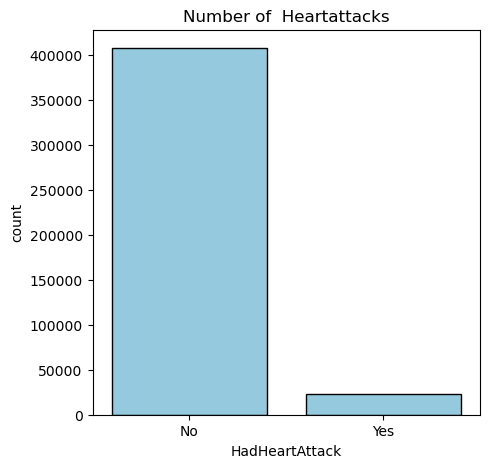

In [23]:
plt.figure(figsize=(5,5))
plt.title('Number of  Heartattacks')
sns.countplot(data=heart_df, x=heart_df['HadHeartAttack'], color='skyblue', edgecolor='black')

In [24]:
heart_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,No,Yes,No,...,Age 80 or older,1.60,78.02,30.47,No,No,No,No,NaN,No
1,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,Yes,Yes,No,...,Age 80 or older,1.45,59.87,28.56,No,No,Yes,Yes,NaN,No
2,Alabama,Female,Fair,6.0,2.0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,Age 80 or older,1.63,58.97,22.31,No,No,Yes,Yes,NaN,No
3,Alabama,Female,Very good,2.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,No,No,No,...,Age 75 to 79,1.68,77.11,27.44,No,Yes,Yes,Yes,NaN,No
4,Alabama,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,No,Yes,No,...,Age 75 to 79,1.73,77.11,25.85,Yes,No,No,Yes,NaN,No


In [25]:
heart_df = heart_df.drop(columns=['TetanusLast10Tdap', 'ChestScan'])

In [26]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      433323 non-null  object 
 1   Sex                        433323 non-null  object 
 2   GeneralHealth              432061 non-null  object 
 3   PhysicalHealthDays         422538 non-null  float64
 4   MentalHealthDays           425215 non-null  float64
 5   LastCheckupTime            424795 non-null  object 
 6   PhysicalActivities         432072 non-null  object 
 7   HighCholesterol            378239 non-null  object 
 8   HighBloodPressure          431404 non-null  object 
 9   HadHeartAttack             430755 non-null  object 
 10  HadAngina                  429092 non-null  object 
 11  HadStroke                  431849 non-null  object 
 12  HadAsthma                  431622 non-null  object 
 13  HadSkinCancer              43

In [27]:
heart_df.to_csv(FINAL_FILE_WITH_NANS_PATH, index=False)

In [28]:
heart_df.dropna().to_csv(FINAL_FILE_NO_NANS_PATH, index=False)



---

